In [1]:
from funcs import eval_snn
from Models import modelpool
from Preprocess import datapool
from utils import replace_maxpool2d_with_avgpool2d, replace_qcfs_with_sn, replace_relu_with_qcfs
import torch
import torch.nn as nn

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
BS = 128
L = 8
T = 8
SNN_MODELS = ['gn', 'pgn']
TAU_RANGE = [2, 4, 6, 8]
MODEL_NAME = 'resnet20'
DATA_NAME = 'cifar10'

In [3]:
def sim(model_name: str, data_name: str, sn_type: str, tau: int):
	loss_fn = nn.CrossEntropyLoss()
	_, test = datapool(data_name, BS)
	model = modelpool(model_name, data_name)
	model = replace_maxpool2d_with_avgpool2d(model)
	model = replace_relu_with_qcfs(model, L)
	model.load_state_dict(torch.load('./saved_models/' + model_name + '-' + data_name + '.pth', weights_only=True))
	model = replace_qcfs_with_sn(model, members=tau, sn_type=sn_type)
	model = model.to(device)
	acc, loss = eval_snn(test, model, loss_fn, device, T)
	return acc, loss

In [4]:
results = {}
for snn_model in SNN_MODELS:
	print('snn_model =', snn_model)
	results[snn_model] = {}
	for tau in TAU_RANGE:
		print('tau =', tau)
		acc, loss = sim(MODEL_NAME, DATA_NAME, snn_model, tau)
		print('acc ->', acc[-1])
		results[snn_model][tau] = (acc, loss)

snn_model = gn
tau = 2
Files already downloaded and verified
Files already downloaded and verified
acc -> 0.7952724
tau = 4
Files already downloaded and verified
Files already downloaded and verified
acc -> 0.9030449
tau = 6
Files already downloaded and verified
Files already downloaded and verified
acc -> 0.9171675
tau = 8
Files already downloaded and verified
Files already downloaded and verified
acc -> 0.9192708
snn_model = pgn
tau = 2
Files already downloaded and verified
Files already downloaded and verified
acc -> 0.79547274
tau = 4
Files already downloaded and verified
Files already downloaded and verified
acc -> 0.903145
tau = 6
Files already downloaded and verified
Files already downloaded and verified
acc -> 0.9172676
tau = 8
Files already downloaded and verified
Files already downloaded and verified
acc -> 0.9192708


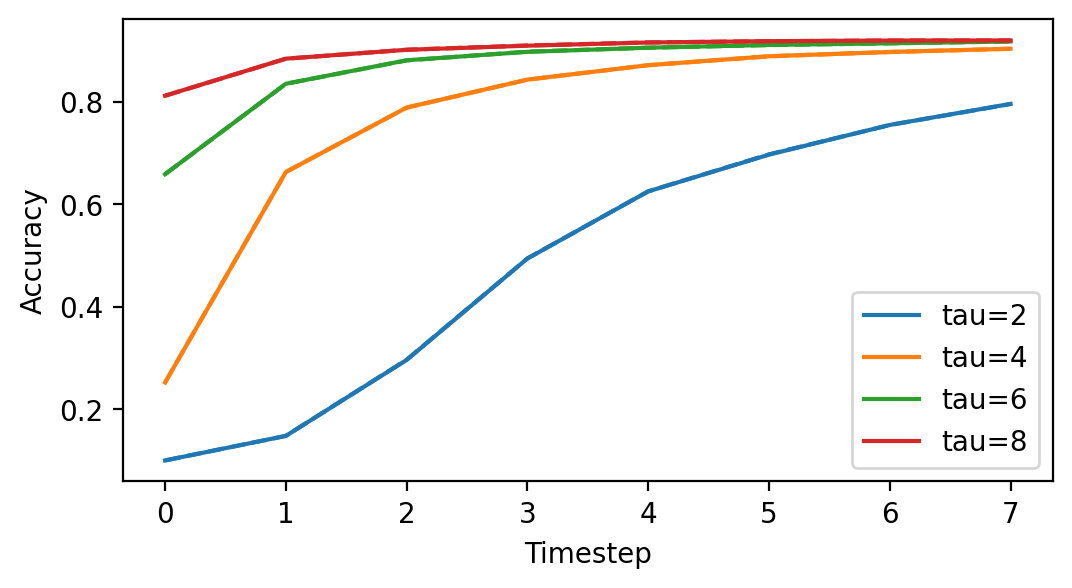

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 3), dpi=200)
plt.xlabel('Timestep')
plt.ylabel('Accuracy')
for i, tau in enumerate(TAU_RANGE):
	acc, loss = results['pgn'][tau]
	plt.plot(acc, label=f'tau={tau}', color=f'C{i}', linestyle='-')
	acc, loss = results['gn'][tau]
	plt.plot(acc, color=f'C{i}', linestyle='--')
plt.legend(loc='lower right');

In [6]:
acc, _ = results['gn'][8]
print(acc)

[0.8112981  0.88361377 0.9011418  0.9094551  0.91536456 0.9177684
 0.91907054 0.9192708 ]
